In [3]:
import requests
import re
import json
import csv
def get_table(page):
    params = {
       'type': 'HSGTHIS',
       'token': '70f12f2f4f091e459a279469fe49eca5',
       'filter': '(MarketType=1)',
       'js': 'var qwGRlQLU={pages:(tp),data:(x)}',
       'ps': 20,
       'p': page,
       'sr': -1,
       'st': 'DetailDate',
       'rt': 52424642
    }
    url = 'http://dcfm.eastmoney.com/EM_MutiSvcExpandInterface/api/js/get?'
    response = requests.get(url, params=params).text
    items = re.search(r'var.*?data:(.*)}', response,re.S)
    data = items.group(1)
    data = json.loads(data)
    #print('\n正在下载第 %s 页表格' % page)
    return data
data=[]
for page in range(1,58):
    data = data+get_table(page)

In [47]:
import pandas as pd
from sqlalchemy import create_engine
engine=create_engine('sqlite:///stocks.sqlite')

In [7]:
create_table="""
CREATE TABLE Stocks
(
市场类型 int,
日期 data,
当日流入 float,
当日余额 float,
历史累计流入 float,
当日成交净买入 float,
买入成交额 float,
卖出成交额 float,
领涨股代码 varchar(10),
领涨股名称 varchar(10),
领涨股涨跌幅 float,
上证指数 float,
上证涨跌幅 float
);
"""

In [8]:
con=engine.connect()
res=con.execute(create_table)

In [9]:
con=engine.connect()
print(engine.table_names())
res=con.execute("SELECT*FROM Stocks")
print(res.fetchall())

['Stocks']
[]


NameError: name 'data' is not defined

In [11]:
Insert_SQL="INSERT INTO Stocks(市场类型,日期,当日流入,当日余额,历史累计流入,当日成交净买入,买入成交额,卖出成交额,领涨股代码,领涨股名称,领涨股涨跌幅,上证指数,上证涨跌幅) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?);"

In [12]:
for i in range(0,len(data)):
    con.execute(Insert_SQL,list(data[i].values()))

In [4]:
import pandas as pd
from sqlalchemy import create_engine
engine=create_engine('sqlite:///stocks.sqlite')

con = engine.connect()
rs = con.execute('SELECT * FROM Stocks')

df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
print(df.head())

   市场类型                   日期     当日流入      当日余额     历史累计流入  当日成交净买入     买入成交额  \
0     1  2019-11-04T00:00:00  2632.31  49367.69  477799.24  2267.69  10436.82   
1     1  2019-11-01T00:00:00  3812.00  48188.00  475531.55  3278.62  11930.46   
2     1  2019-10-31T00:00:00  3696.65  48303.35  472252.93  3189.40  12309.57   
3     1  2019-10-30T00:00:00   961.17  51038.83  469063.53   637.87  10370.04   
4     1  2019-10-29T00:00:00  1204.06  50795.94  468425.66   888.55   8799.76   

     卖出成交额   领涨股代码 领涨股名称   领涨股涨跌幅     上证指数     上证涨跌幅  
0  8169.13  603008   喜临门   9.6307  2975.49  0.005845  
1  8651.84  600216  浙江医药  10.0176  2958.20  0.009949  
2  9120.17  600208  新湖中宝  10.1299  2929.06 -0.003491  
3  9732.17  600093  禾嘉股份  10.0129  2939.32 -0.005030  
4  7911.21  601789  宁波建工  10.1299  2954.18 -0.008681  


In [5]:
date_times=pd.to_datetime(df['日期'])
df=df.set_index(date_times)
df.head()

,市场类型,日期,当日流入,当日余额,历史累计流入,当日成交净买入,买入成交额,卖出成交额,领涨股代码,领涨股名称,领涨股涨跌幅,上证指数,上证涨跌幅
日期,,,,,,,,,,,,,
2019-11-04,1,2019-11-04T00:00:00,2632.31,49367.69,477799.24,2267.69,10436.82,8169.13,603008,喜临门,9.6307,2975.49,0.005845
2019-11-01,1,2019-11-01T00:00:00,3812.00,48188.00,475531.55,3278.62,11930.46,8651.84,600216,浙江医药,10.0176,2958.20,0.009949
2019-10-31,1,2019-10-31T00:00:00,3696.65,48303.35,472252.93,3189.40,12309.57,9120.17,600208,新湖中宝,10.1299,2929.06,-0.003491
2019-10-30,1,2019-10-30T00:00:00,961.17,51038.83,469063.53,637.87,10370.04,9732.17,600093,禾嘉股份,10.0129,2939.32,-0.005030
2019-10-29,1,2019-10-29T00:00:00,1204.06,50795.94,468425.66,888.55,8799.76,7911.21,601789,宁波建工,10.1299,2954.18,-0.008681


In [6]:
df_cl=df.iloc[:,2:13]
df_cl.head()

,当日流入,当日余额,历史累计流入,当日成交净买入,买入成交额,卖出成交额,领涨股代码,领涨股名称,领涨股涨跌幅,上证指数,上证涨跌幅
日期,,,,,,,,,,,
2019-11-04,2632.31,49367.69,477799.24,2267.69,10436.82,8169.13,603008,喜临门,9.6307,2975.49,0.005845
2019-11-01,3812.00,48188.00,475531.55,3278.62,11930.46,8651.84,600216,浙江医药,10.0176,2958.20,0.009949
2019-10-31,3696.65,48303.35,472252.93,3189.40,12309.57,9120.17,600208,新湖中宝,10.1299,2929.06,-0.003491
2019-10-30,961.17,51038.83,469063.53,637.87,10370.04,9732.17,600093,禾嘉股份,10.0129,2939.32,-0.005030
2019-10-29,1204.06,50795.94,468425.66,888.55,8799.76,7911.21,601789,宁波建工,10.1299,2954.18,-0.008681


In [7]:
df_cl['当日流入']=(df_cl['当日流入']/100.0).map(lambda x:('%.2f')%x)
df_cl['当日余额']=(df_cl['当日余额']/100.0).map(lambda x:('%.2f')%x)
df_cl['历史累计流入']=(df_cl['历史累计流入']/100.0).map(lambda x:('%.2f')%x)
df_cl['当日成交净买入']=(df_cl['当日成交净买入']/100.0).map(lambda x:('%.2f')%x)
df_cl['买入成交额']=(df_cl['买入成交额']/100.0).map(lambda x:('%.2f')%x)
df_cl['卖出成交额']=(df_cl['卖出成交额']/100.0).map(lambda x:('%.2f')%x)

In [8]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1140 entries, 2019-11-04 to 2014-12-04
Data columns (total 11 columns):
当日流入       1140 non-null object
当日余额       1140 non-null object
历史累计流入     1140 non-null object
当日成交净买入    1140 non-null object
买入成交额      1140 non-null object
卖出成交额      1140 non-null object
领涨股代码      1140 non-null object
领涨股名称      1140 non-null object
领涨股涨跌幅     1140 non-null float64
上证指数       1140 non-null float64
上证涨跌幅      1140 non-null float64
dtypes: float64(3), object(8)
memory usage: 106.9+ KB


In [ ]:
# df_cl['领涨股涨跌幅']=(df_cl['领涨股涨跌幅']).map(lambda x:('%.2f%%')%x)
# df_cl['上证涨跌幅']=(df_cl['上证涨跌幅']*100.0).map(lambda x:('%.2f%%')%x)

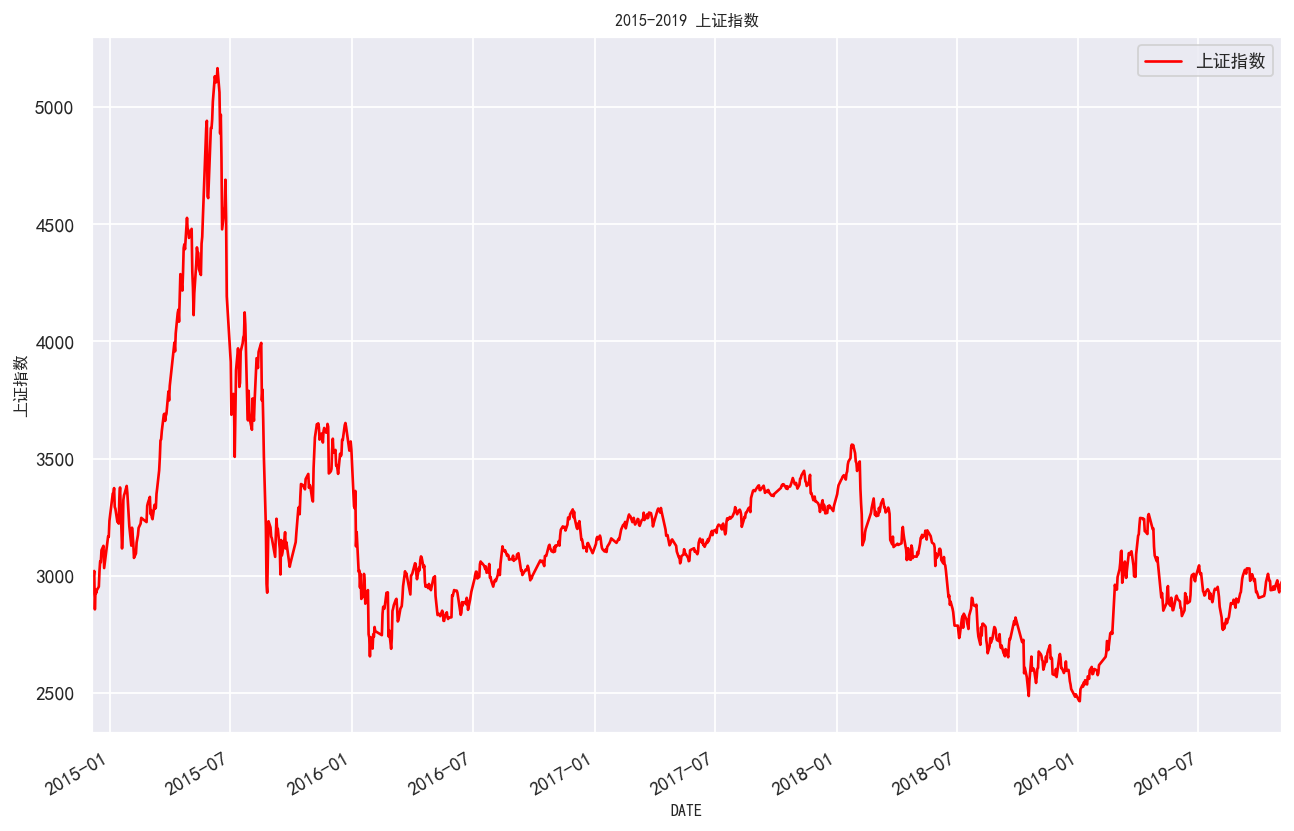

In [9]:
# 时间序列图
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
sns.set()
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(12,8),dpi=128)
df_cl['上证指数'].plot(grid=True,color='red',label='上证指数')
plt.title('2015-2019 上证指数',fontsize='9')
plt.ylabel('上证指数',fontsize='9')
plt.xlabel('DATE',fontsize='9')
plt.legend(loc='best',fontsize='small')
plt.show()

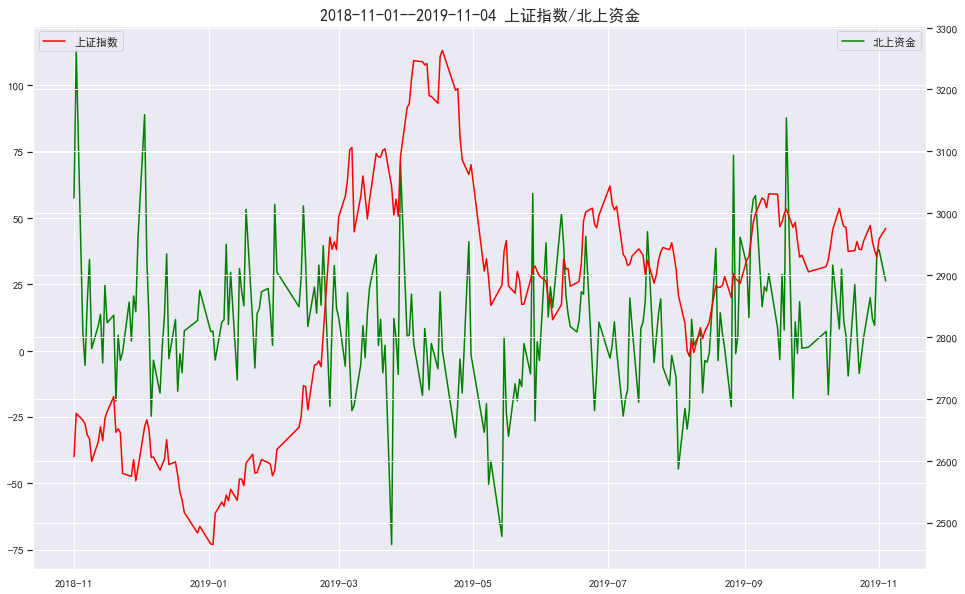

In [14]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
# plt.figure(figsize=(8,8),dpi=128)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_size_inches([16,10])

df_cl['当日流入']=pd.DataFrame(df_cl['当日流入'],dtype=np.float)
df_cl['上证指数']=pd.DataFrame(df_cl['上证指数'],dtype=np.float)
df_cl['当日余额']=pd.DataFrame(df_cl['当日余额'],dtype=np.float)
df_cl['当日成交净买入']=pd.DataFrame(df_cl['当日成交净买入'],dtype=np.float)
df19=df_cl.loc['2019-11-04':'2018-11-01']
plt.title('2018-11-01--2019-11-04 上证指数/北上资金',fontsize='16')
ax1.plot(df19.index,df19['当日流入'],color='green',label='北上资金')
ax1.legend(loc=1)
ax2.plot(df19.index,df19['上证指数'],color='red',label='上证指数')
ax2.legend(loc=2)
plt.show()

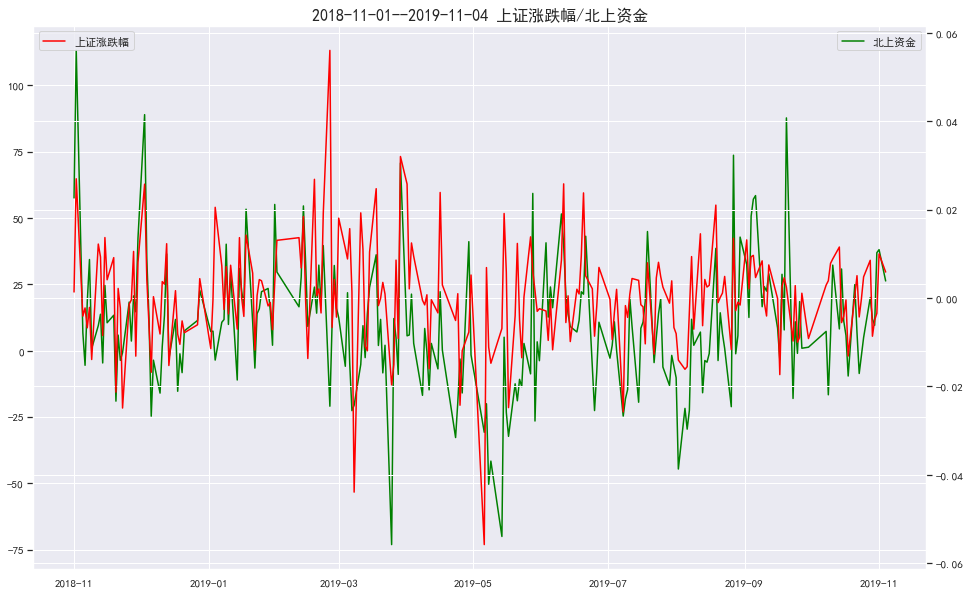

In [46]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
# plt.figure(figsize=(8,8),dpi=128)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_size_inches([16,10])

df_cl['当日流入']=pd.DataFrame(df_cl['当日流入'],dtype=np.float)
df_cl['上证指数']=pd.DataFrame(df_cl['上证指数'],dtype=np.float)
df_cl['当日余额']=pd.DataFrame(df_cl['当日余额'],dtype=np.float)
df_cl['当日成交净买入']=pd.DataFrame(df_cl['当日成交净买入'],dtype=np.float)
df19=df_cl.loc['2019-11-04':'2018-11-01']
plt.title('2018-11-01--2019-11-04 上证涨跌幅/北上资金',fontsize='16')
ax1.plot(df19.index,df19['当日流入'],color='green',label='北上资金')
ax1.legend(loc=1)
ax2.plot(df19.index,df19['上证涨跌幅'],color='red',label='上证涨跌幅')
ax2.legend(loc=2)
plt.show()

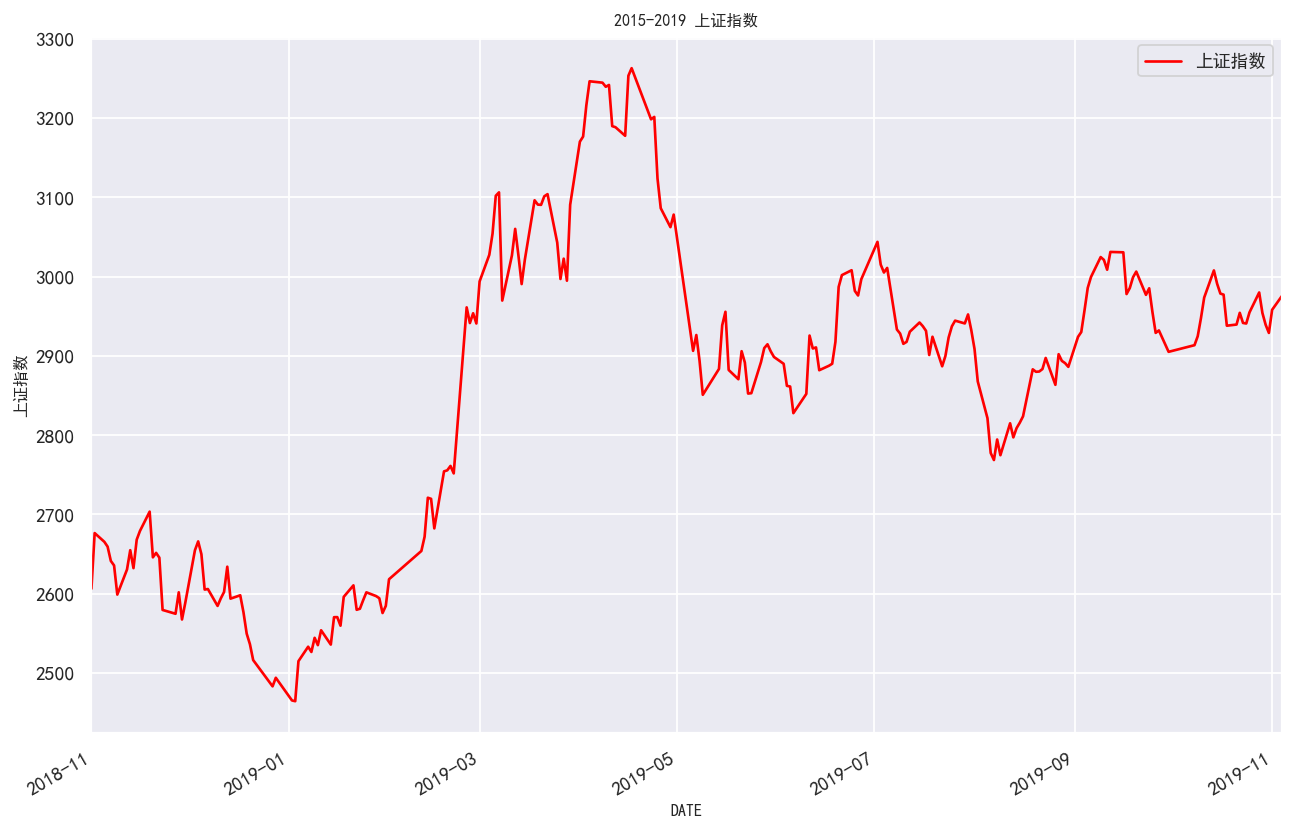

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
sns.set()
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(12,8),dpi=128)
df19['上证指数'].plot(grid=True,color='red',label='上证指数')
plt.title('2015-2019 上证指数',fontsize='9')
plt.ylabel('上证指数',fontsize='9')
plt.xlabel('DATE',fontsize='9')
plt.legend(loc='best',fontsize='small')
plt.show()

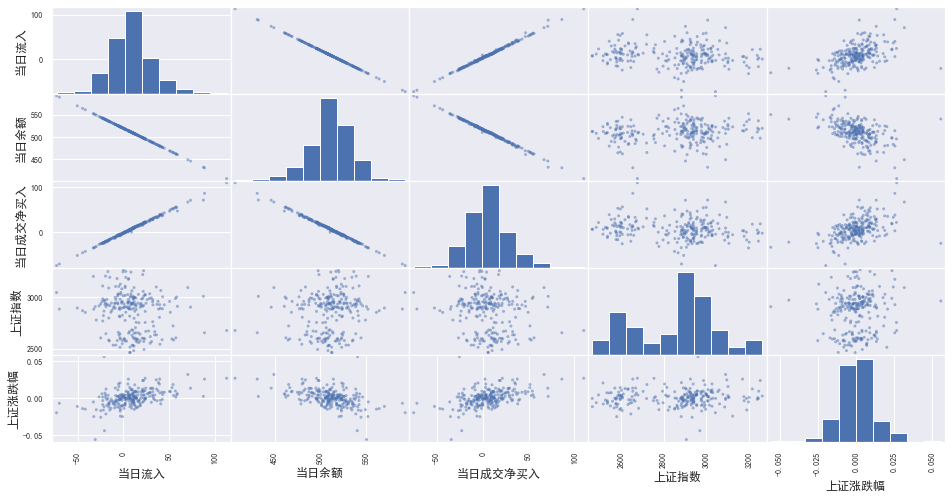

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df19[['当日流入','当日余额','当日成交净买入','上证指数','上证涨跌幅']],figsize=(16,8))
plt.show()

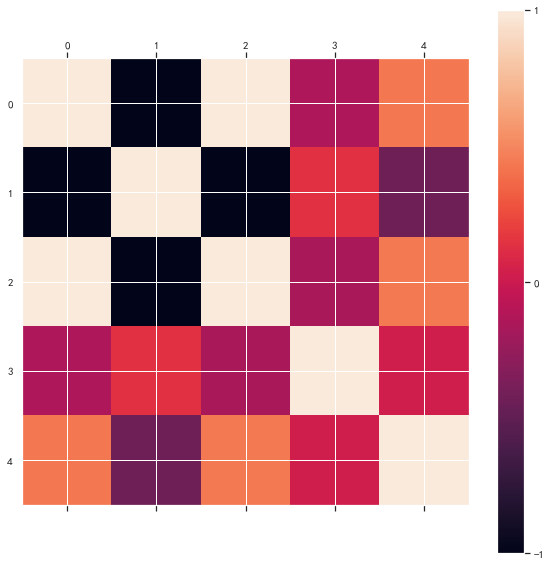

In [21]:
df2019=df_cl.loc['2019-11-04':'2019-01-01']
cov=np.corrcoef(df2019[['当日流入','当日余额','当日成交净买入','上证指数','上证涨跌幅']].T)
fig, ax = plt.subplots()
fig.set_size_inches([10,10])
img=ax.matshow(cov)
plt.colorbar(img,ticks=[-1,0,1])
plt.show()

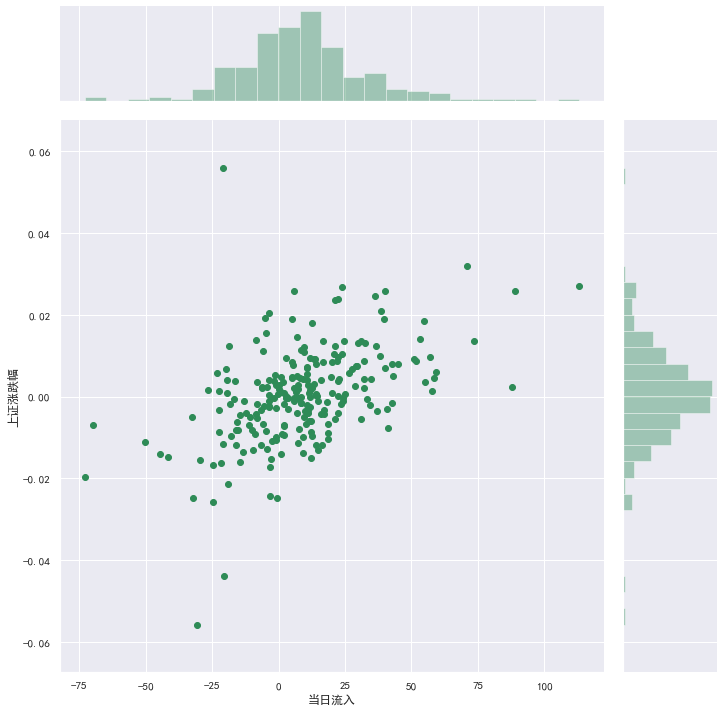

In [61]:
df_pct = df19[['当日流入','上证涨跌幅']]
sns.jointplot('当日流入','上证涨跌幅',df19,kind='scatter',color='seagreen',size=10)

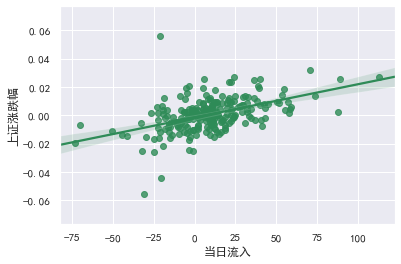

In [63]:
sns.regplot(x=df19['当日流入'],y=df19['上证涨跌幅'],data=df19,color='seagreen')
mpl.rcParams['font.sans-serif']=['SimHei']

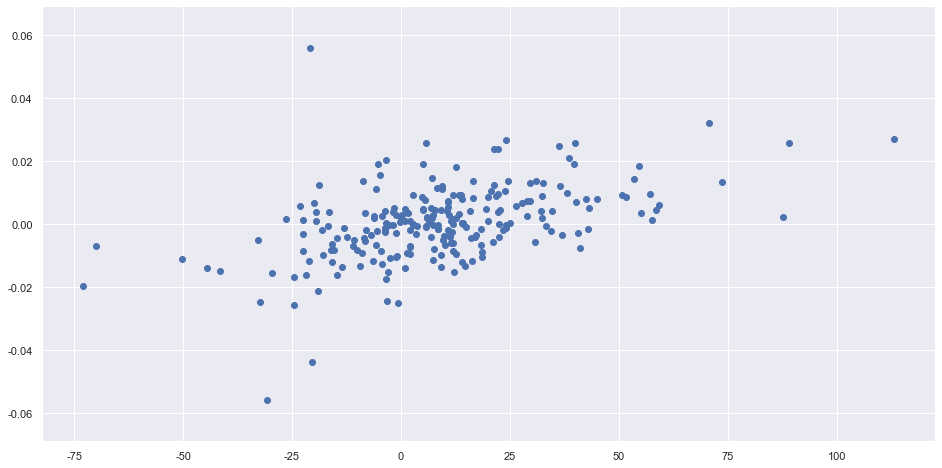

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches([16,8])
ax.scatter(df19['当日流入'],y=df19['上证涨跌幅'])

In [15]:
import tushare as ts
ts.set_token('ddd7bdd30799c09e4b87c739303f9f783a26270f91537a5458516ef7')
pro = ts.pro_api()
dfs = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')
dfs

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20180718,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
1,000001.SZ,20180717,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2,000001.SZ,20180716,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
3,000001.SZ,20180713,8.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
4,000001.SZ,20180712,8.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828
5,000001.SZ,20180711,8.76,8.83,8.68,8.78,8.98,-0.20,-2.23,851296.70,744765.824
6,000001.SZ,20180710,9.02,9.02,8.89,8.98,9.03,-0.05,-0.55,896862.02,803038.965
7,000001.SZ,20180709,8.69,9.03,8.68,9.03,8.66,0.37,4.27,1409954.60,1255007.609
8,000001.SZ,20180706,8.61,8.78,8.45,8.66,8.60,0.06,0.70,988282.69,852071.526
9,000001.SZ,20180705,8.62,8.73,8.55,8.60,8.61,-0.01,-0.12,835768.77,722169.579


In [64]:
import tushare as ts
df_stock=ts.get_hist_data('600776',start='2018-11-01',end='2019-11-04')
df_stock

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-11-04,19.80,19.96,19.63,19.60,106512.51,-0.07,-0.35,19.674,19.951,20.314,127727.67,143664.96,153305.15
2019-11-01,19.55,19.79,19.70,19.07,117652.01,0.17,0.87,19.822,20.063,20.353,147228.47,149402.51,153575.27
2019-10-31,19.63,20.09,19.53,19.52,131564.45,0.01,0.05,19.840,20.175,20.388,153050.45,159850.62,156729.27
2019-10-30,19.88,19.89,19.52,19.45,123091.46,-0.47,-2.35,19.916,20.282,20.426,160696.19,161054.04,165225.58
2019-10-29,20.37,20.40,19.99,19.88,159817.91,-0.38,-1.86,20.106,20.380,20.544,163567.68,159441.25,172774.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-07,4.41,4.59,4.43,4.33,99689.89,0.03,0.68,4.326,4.218,4.098,75591.11,60837.65,52739.03
2018-11-06,4.28,4.41,4.40,4.27,80579.70,0.10,2.33,4.280,4.182,4.105,69164.68,53948.10,48686.03
2018-11-05,4.28,4.34,4.30,4.25,51846.94,-0.02,-0.46,4.228,4.148,4.112,62537.82,49860.39,45796.05


In [ ]:
# date_times=pd.to_datetime(df['日期'])
# df=df.set_index(date_times)
# df.head()

In [65]:
import pandas as pd
df_stock.info()
df_stock_times=pd.to_datetime(df_stock.index)
df_stock=df_stock.set_index(df_stock_times)
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 2019-11-04 to 2018-11-01
Data columns (total 13 columns):
open            245 non-null float64
high            245 non-null float64
close           245 non-null float64
low             245 non-null float64
volume          245 non-null float64
price_change    245 non-null float64
p_change        245 non-null float64
ma5             245 non-null float64
ma10            245 non-null float64
ma20            245 non-null float64
v_ma5           245 non-null float64
v_ma10          245 non-null float64
v_ma20          245 non-null float64
dtypes: float64(13)
memory usage: 26.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2019-11-04 to 2018-11-01
Data columns (total 13 columns):
open            245 non-null float64
high            245 non-null float64
close           245 non-null float64
low             245 non-null float64
volume          245 non-null float64
price_change    245 non-null float64
p_change      

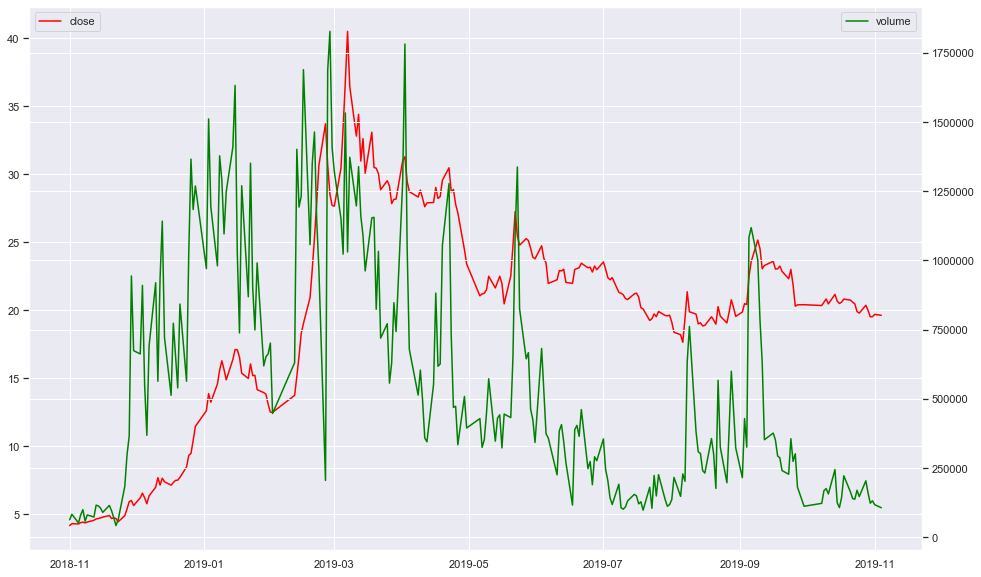

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
sns.set()
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_size_inches([16,10])
ax1.plot(df_stock['close'],color='red',label='close')
ax1.legend(loc=2)
ax2.plot(df_stock['volume'],color='green',label='volume')
ax2.legend(loc=1)
plt.show()

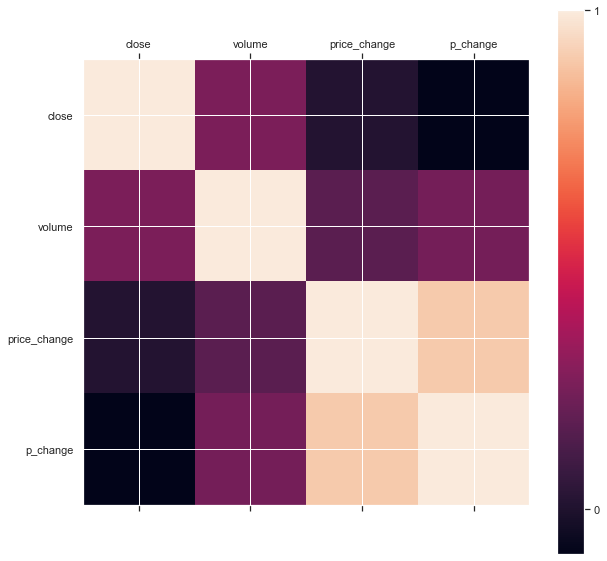

In [67]:
matplotlib.rcParams['axes.unicode_minus']=False
cov=np.corrcoef(df_stock[['close','volume','price_change','p_change']].T)
fig, ax = plt.subplots()
fig.set_size_inches([10,10])
img=ax.matshow(cov)
label=['','close','volume','price_change','p_change']
ax.set_xticklabels(label)
ax.set_yticklabels(label)
plt.colorbar(img,ticks=[-1,0,1])
plt.show()

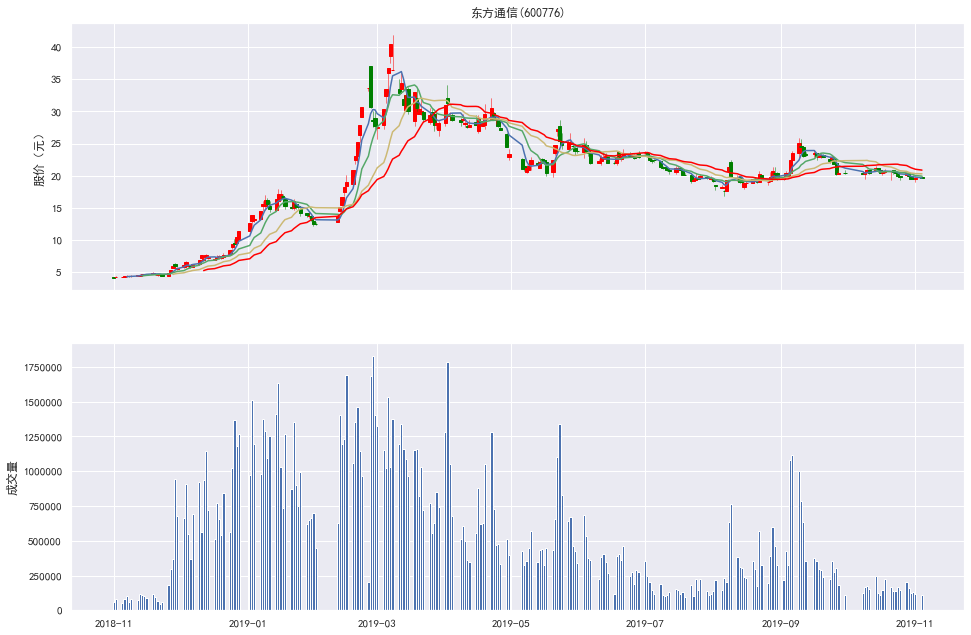

In [163]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import tushare as ts
import mpl_finance as mpf
from matplotlib.pylab import date2num  
import datetime  

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

stock_prices = ts.get_k_data('600776','2018-11-01','2019-11-04')
#prices = ts.get_k_data('600776','2019-09-30','2019-11-04')
# 创建一个函数将tushare获得的日期转化为candlestick_ochl()函数可以识别的日期
def date_to_num(dates):
    numoftime = []
    for date in dates:
        date_time = datetime.datetime.strptime(date,'%Y-%m-%d')
        num_date = date2num(date_time)
        numoftime.append(num_date)
    return numoftime

# matrix_prices = prices.values
# numoftime = date_to_num(matrix_prices[:,0])
# matrix_prices[:,0] = numoftime

matrix_prices = stock_prices.values
numoftime = date_to_num(matrix_prices[:,0])
matrix_prices[:,0] = numoftime


# 绘k线图 
fig, (ax1,ax2) = plt.subplots(2,sharex = True,figsize = (16,12))  
fig.subplots_adjust(bottom=0.2)  
ax1.xaxis_date()  
mpf.candlestick_ochl(ax1,matrix_prices,width=1.5,colorup='red',colordown='green')   
ax1.set_title("东方通信(600776)")    
ax1.set_ylabel("股价（元）")   
ax1.grid(True) 
plt.bar(matrix_prices[:,0],matrix_prices[:,5],width=1)
ax2.set_ylabel('成交量')
ax2.grid(True)

# 均线
#prices['close_mean5']=np.round(prices['close'].rolling(window=5,min_periods=5,center=False).mean(),2)

#df_stock=df_stock.sort_index(ascending=True)

stock_prices['close_mean5']=np.round(stock_prices['close'].rolling(window=5,min_periods=5,center=False).mean(),2)
stock_prices['close_mean10']=np.round(stock_prices['close'].rolling(window=10,center=False).mean(),2)
stock_prices['close_mean20']=np.round(stock_prices['close'].rolling(window=20,center=False).mean(),2)
stock_prices['close_mean30']=np.round(stock_prices['close'].rolling(window=30,center=False).mean(),2)

ax1.plot(matrix_prices[:,0],stock_prices['close_mean5'],color='b')
ax1.plot(matrix_prices[:,0],stock_prices['close_mean10'],color='g')
ax1.plot(matrix_prices[:,0],stock_prices['close_mean20'],color='y')
ax1.plot(matrix_prices[:,0],stock_prices['close_mean30'],color='red')

#df_stockdata=df_stock.loc['2018-11-01':'2019-11-04']  #获取某个时间段内的时间序列数据
# ax1.plot(df_stock['close_mean5'],color='b')
# ax1.plot(df_stock['close_mean10'],color='g')
# ax1.plot(df_stock['close_mean20'],color='y')
# ax1.plot(df_stock['close_mean30'],color='red')
# prices_times=pd.to_datetime(prices['date'])
# prices=prices.set_index(prices_times)
# prices['close_mean5']=np.round(prices['close'].rolling(window=5,min_periods=5,center=False).mean(),2)
# ax1.plot(prices['close_mean5'],color='b')
# plt.show()

In [154]:
stock_prices['close_mean5']

201      NaN
202      NaN
203      NaN
204      NaN
205     4.33
       ...  
441    20.11
442    19.92
443    19.84
444    19.82
445    19.67
Name: close_mean5, Length: 245, dtype: float64

In [130]:
# help(mpf.candlestick_ochl)
matrix_prices[:,5]

201    62975.0
202    82864.0
203    51846.0
204    80579.0
205    99689.0
Name: volume, dtype: float64

In [147]:
df_stock['date']=df_stock.index
df_stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,close_mean5,close_mean10,close_mean20,close_mean30,date
date,,,,,,,,,,,,,,,,,,
2018-11-01,4.25,4.33,4.18,4.18,62975.01,-0.02,-0.48,4.138,4.091,4.145,50873.11,47825.89,43089.69,NaN,NaN,NaN,NaN,2018-11-01
2018-11-02,4.28,4.38,4.32,4.22,82864.02,0.14,3.35,4.182,4.131,4.123,60063.12,51602.36,45655.87,NaN,NaN,NaN,NaN,2018-11-02
2018-11-05,4.28,4.34,4.30,4.25,51846.94,-0.02,-0.46,4.228,4.148,4.112,62537.82,49860.39,45796.05,NaN,NaN,NaN,NaN,2018-11-05
2018-11-06,4.28,4.41,4.40,4.27,80579.70,0.10,2.33,4.280,4.182,4.105,69164.68,53948.10,48686.03,NaN,NaN,NaN,NaN,2018-11-06
2018-11-07,4.41,4.59,4.43,4.33,99689.89,0.03,0.68,4.326,4.218,4.098,75591.11,60837.65,52739.03,4.33,NaN,NaN,NaN,2018-11-07


In [138]:
print(df_stock['close_mean5'].head(10))
print(df_stock['ma5'].head(10))
df_stock['close']

date
2019-11-04      NaN
2019-11-01      NaN
2019-10-31      NaN
2019-10-30      NaN
2019-10-29    19.67
2019-10-28    19.82
2019-10-25    19.84
2019-10-24    19.92
2019-10-23    20.11
2019-10-22    20.23
Name: close_mean5, dtype: float64
date
2019-11-04    19.674
2019-11-01    19.822
2019-10-31    19.840
2019-10-30    19.916
2019-10-29    20.106
2019-10-28    20.228
2019-10-25    20.304
2019-10-24    20.510
2019-10-23    20.648
2019-10-22    20.654
Name: ma5, dtype: float64


date
2019-11-04    19.63
2019-11-01    19.70
2019-10-31    19.53
2019-10-30    19.52
2019-10-29    19.99
              ...  
2018-11-07     4.43
2018-11-06     4.40
2018-11-05     4.30
2018-11-02     4.32
2018-11-01     4.18
Name: close, Length: 245, dtype: float64